In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing data**

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/NUS_FinTech/Project1/NVDA.csv"
df_NVDA = pd.read_csv(path)
df_NVDA

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415963,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383690,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382495,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381300,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363370,24403200
...,...,...,...,...,...,...,...
5972,2022-10-17,115.180000,119.480003,115.169998,118.879997,118.879997,58077400
5973,2022-10-18,123.440002,124.919998,116.180000,119.669998,119.669998,65936200
5974,2022-10-19,118.790001,123.500000,118.339996,120.510002,120.510002,52313100
5975,2022-10-20,121.129997,127.690002,121.050003,121.940002,121.940002,65239800


**Checking if time-series is stationary using ADF test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_NVDA["Close"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

#since p-value > 0.05, we conclude that the time-series is not stationary

ADF Statistic: -0.9254580922344793
p-value: 0.779473147249061


**Choice of d**

**Finding out what is the order of differencing required to make time series stationary using the pmdarima package**

d = 1



In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf

#using the pmdarima package to find out appropriate differencing to use
#!pip install pmdarima
from pmdarima.arima.utils import ndiffs

ndiffs(df_NVDA["Close"], test="adf")
#ndiff = 1 

1

**Choice of p**

**Choosing number of lags to be used as predictors in the arima model**

p = 11

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


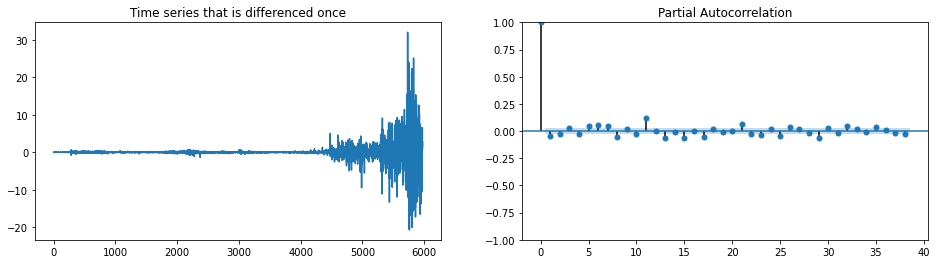

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df_NVDA["Close"].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Time series that is differenced once")
ax2.set_ylim(0,20)
plot_pacf(diff, ax=ax2);

**Choice of q**

**Choosing number of lagged forecast errors that should go into the ARIMA model**

using ACF plot

q = 6

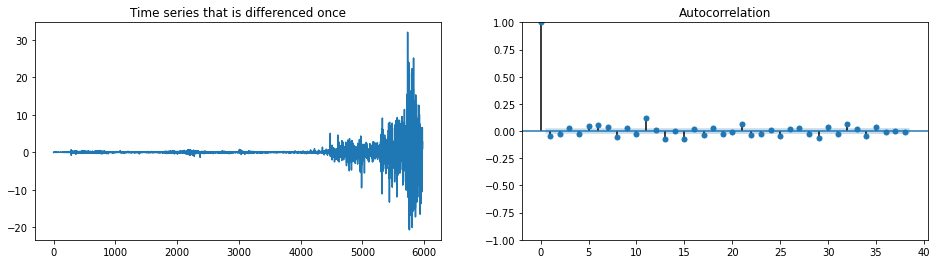

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

diff = df_NVDA["Close"].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Time series that is differenced once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

**Fitting the ARIMA model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_NVDA["Close"], order=(11, 2, 6))
result = model.fit(method_kwargs={"warn_convergence": False})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5977
Model:                ARIMA(11, 2, 6)   Log Likelihood              -12824.648
Date:                Sun, 23 Oct 2022   AIC                          25685.296
Time:                        16:27:37   BIC                          25805.812
Sample:                             0   HQIC                         25727.157
                               - 5977                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5492      0.498     -3.110      0.002      -2.526      -0.573
ar.L2         -1.2764      0.515     -2.478      0.013      -2.286      -0.267
ar.L3         -1.3316      0.369     -3.610      0.0

In [ ]:
predicted = result.predict()
    #start=1,
    #end=5977,
    #dynamic=False

actual = df_NVDA["Close"]


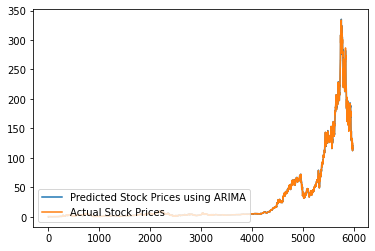

In [ ]:
plt.plot(predicted, label="Predicted Stock Prices using ARIMA")
plt.plot(actual, label = "Actual Stock Prices")

plt.legend(loc="lower left")

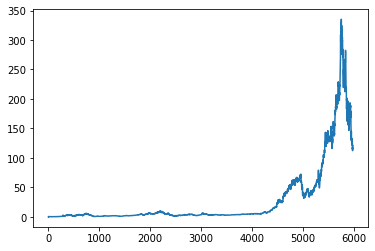

In [ ]:
result.predict().plot()

***Using the ARIMA model to forecast for the next two weeks ***

In [ ]:
forecast = result.forecast(10)
forecast 

5977    124.440309
5978    124.107770
5979    126.411017
5980    125.511849
5981    125.907786
5982    125.195442
5983    125.116102
5984    126.385500
5985    126.013034
5986    126.579860
Name: predicted_mean, dtype: float64

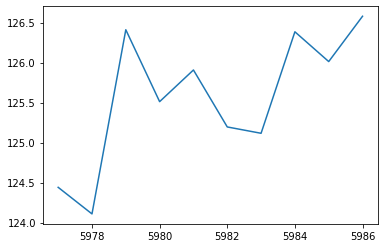

In [ ]:
plt.plot(forecast)

**Export predictions for the next 10 trading days**

In [ ]:
forecast.to_csv("JacksonTiong_Impl_2.csv")